# Import Libraries

In [1]:
from transformers.auto_correlation import AutocorrelationTransformer
from transformers.seasonality import SeasonalityFeaturesTransformer
from transformers.interpolation import InterpolationTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit
from transformers.outlier import OutlierTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from transformers.trend import TrendTransformer
from sklearn.tree import DecisionTreeRegressor
from scikeras.wrappers import KerasRegressor
from sklearn.pipeline import Pipeline
from keras.layers import Dense, LSTM
from matplotlib import pyplot as plt
from keras.models import Sequential
from xgboost import XGBRegressor
from sklearn.svm import SVR
from typing import List
from glob import glob
import pandas as pd
import numpy as np
import pickle
import mlflow

2023-12-02 13:11:50.195889: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-02 13:11:50.228902: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-02 13:11:50.228936: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-02 13:11:50.228953: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-02 13:11:50.235754: I tensorflow/core/platform/cpu_feature_g

# Data Loading

In [2]:
datasets_paths = glob("../data/train/*.csv")
datasets: List[pd.DataFrame] = [
    pd.read_csv(path, index_col=0, parse_dates=True) for path in datasets_paths
]
datasets_names = [path.split("/")[-1].split(".")[0] for path in datasets_paths]

# Load Pipelines 

In [3]:
preprocessing_pipelines = [
    pickle.load(open(f"./preprocessing_pipelines/{dataset_name}.pkl", "rb"))
    for dataset_name in datasets_names
]

In [4]:
dataset = datasets[15]

In [5]:
preprocessing_pipeline = preprocessing_pipelines[15]

# Fit the pipeline

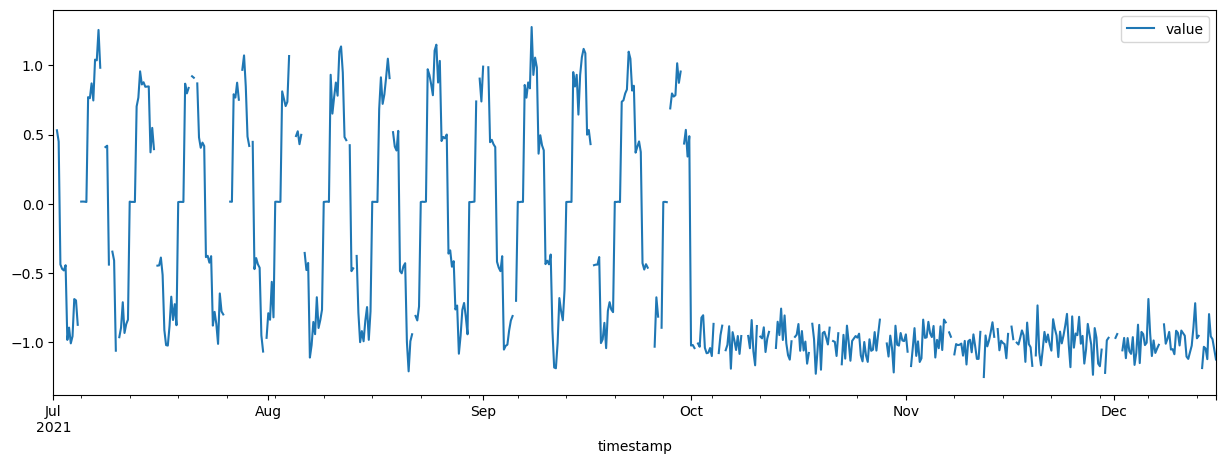

In [6]:
dataset.plot(figsize=(15, 5))
plt.show()

In [7]:
dataset

,value
timestamp,
2021-07-01 00:00:00,0.459726
2021-07-01 06:00:00,NaN
2021-07-01 12:00:00,0.530672
2021-07-01 18:00:00,0.448953
2021-07-02 00:00:00,-0.439928
...,...
2021-12-14 18:00:00,-0.799158
2021-12-15 00:00:00,-0.960644
2021-12-15 06:00:00,-0.980706


In [8]:
pre_dataset: pd.DataFrame = preprocessing_pipeline.transform(dataset)

In [9]:
pre_dataset.head(10)

,value,seasonality_sin_0,seasonality_sin_1,seasonality_sin_2,seasonality_sin_3,seasonality_sin_4,seasonality_cos_0,seasonality_cos_1,seasonality_cos_2,seasonality_cos_3,seasonality_cos_4,trend,lag_1,lag_5,lag_9,lag_6,lag_10
timestamp,,,,,,,,,,,,,,,,,
2021-07-01 00:00:00,0.459726,-0.918569,-0.744960,0.284135,0.222812,0.878655,-0.395261,-0.667109,0.958784,0.974861,-0.477457,0.298924,0.459726,0.459726,0.459726,0.459726,0.459726
2021-07-01 06:00:00,0.495199,0.484312,-0.948626,0.892999,0.998350,-0.808446,-0.874896,0.316399,0.450059,0.057423,0.588571,0.298924,0.459726,0.459726,0.459726,0.459726,0.459726
2021-07-01 12:00:00,0.530672,0.174696,-0.195349,0.939705,-0.736945,0.724270,-0.984623,0.980734,-0.341987,-0.675953,-0.689517,0.298924,0.495199,0.459726,0.459726,0.459726,0.459726
2021-07-01 18:00:00,0.448953,0.962474,0.754990,0.999995,-0.854408,-0.627582,0.271374,0.655736,0.003255,0.519603,0.778551,0.298924,0.530672,0.459726,0.459726,0.459726,0.459726
2021-07-02 00:00:00,-0.439928,-0.365383,0.943720,0.687609,0.261169,0.520052,0.930857,-0.330747,-0.726082,0.965293,-0.854135,0.298924,0.448953,0.459726,0.459726,0.459726,0.459726
2021-07-02 06:00:00,-0.472273,-0.044051,0.180455,-0.057639,0.999839,-0.403538,0.999029,-0.983583,-0.998337,0.017919,0.914963,0.170391,-0.439928,0.459726,0.459726,0.459726,0.459726
2021-07-02 12:00:00,-0.483305,-0.989752,-0.764846,-0.766602,-0.763085,0.280052,-0.142799,-0.644213,-0.642123,-0.646298,-0.959985,0.077006,-0.472273,0.495199,0.459726,0.459726,0.459726
2021-07-02 18:00:00,-0.445376,0.240143,-0.938596,-0.992976,-0.833203,-0.151729,-0.970738,0.345019,0.118319,0.552967,0.988422,0.011709,-0.483305,0.530672,0.459726,0.495199,0.459726
2021-07-03 00:00:00,-0.985939,-0.087355,-0.165520,-0.594254,0.299117,0.020784,-0.996177,0.986206,0.804277,0.954216,-0.999784,-0.099141,-0.445376,0.448953,0.459726,0.530672,0.459726


# Experiment with different Models


In [10]:
X = pre_dataset.drop(columns=["value"])
y = pre_dataset["value"]

## Linear Regression

In [11]:
lr = LinearRegression()

lr_scores = pd.Series(
    -cross_val_score(
        lr,
        X,
        y,
        scoring="neg_mean_squared_error",
        cv=TimeSeriesSplit(n_splits=10),
    )
)

In [12]:
lr_scores.describe()

count    10.000000
mean      0.082515
std       0.098312
min       0.017112
25%       0.030347
50%       0.061925
75%       0.077105
max       0.352746
dtype: float64

## Logistic Regression

In [13]:
# Creating the polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

polyr = LinearRegression()

polyr_scores = pd.Series(
    -cross_val_score(
        polyr,
        X_poly,
        y,
        scoring="neg_mean_squared_error",
        cv=TimeSeriesSplit(n_splits=10),
    )
)

In [14]:
polyr_scores.describe()

count    10.000000
mean      0.149131
std       0.115782
min       0.027686
25%       0.067621
50%       0.132510
75%       0.163261
max       0.395128
dtype: float64

## Support Vector Machine

In [15]:
svr = SVR()

svr_scores = pd.Series(
    -cross_val_score(
        svr,
        X,
        y,
        scoring="neg_mean_squared_error",
        cv=TimeSeriesSplit(n_splits=10),
    )
)

In [16]:
svr_scores.describe()

count    10.000000
mean      0.097730
std       0.138009
min       0.016957
25%       0.033411
50%       0.056505
75%       0.083298
max       0.482222
dtype: float64

## Decision Tree

In [17]:
dt = DecisionTreeRegressor()

dt_scores = pd.Series(
    -cross_val_score(
        dt,
        X,
        y,
        scoring="neg_mean_squared_error",
        cv=TimeSeriesSplit(n_splits=10),
    )
)

In [18]:
dt_scores.describe()

count    10.000000
mean      0.118125
std       0.106525
min       0.024170
25%       0.065493
50%       0.094444
75%       0.113876
max       0.402914
dtype: float64

## Random Forest

In [19]:
rf = RandomForestRegressor()

rf_scores = pd.Series(
    -cross_val_score(
        rf,
        X,
        y,
        scoring="neg_mean_squared_error",
        cv=TimeSeriesSplit(n_splits=10),
    )
)

In [20]:
rf_scores.describe()

count    10.000000
mean      0.054274
std       0.044906
min       0.010085
25%       0.023139
50%       0.051545
75%       0.059344
max       0.166104
dtype: float64

## Neural Networks MLPRegressor

In [21]:
nn = MLPRegressor()

nn_scores = pd.Series(
    -cross_val_score(
        nn,
        X,
        y,
        scoring="neg_mean_squared_error",
        cv=TimeSeriesSplit(n_splits=10),
    )
)

/home/mmostafa/miniconda3/envs/aienv10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [22]:
nn_scores.describe()

count    10.000000
mean      0.093638
std       0.101529
min       0.028534
25%       0.041620
50%       0.058655
75%       0.088402
max       0.371808
dtype: float64

## XGBoost Regressor

In [23]:
xgb = XGBRegressor()
xgb_scores = pd.Series(
    -cross_val_score(
        xgb,
        X,
        y,
        scoring="neg_mean_squared_error",
        cv=TimeSeriesSplit(n_splits=10),
    )
)

In [24]:
xgb_scores.describe()

count    10.000000
mean      0.092905
std       0.108403
min       0.013328
25%       0.038393
50%       0.068324
75%       0.093561
max       0.389061
dtype: float64

# Compare the models

In [25]:
# Combine all the scores in a single DataFrame
scores = pd.DataFrame(
    {
        "Linear Regression": lr_scores.describe(),
        "Polynomial Regression": polyr_scores.describe(),
        "Support Vector Regression": svr_scores.describe(),
        "Decision Tree": dt_scores.describe(),
        "Random Forest": rf_scores.describe(),
        "Neural Network": nn_scores.describe(),
        "XGBoost": xgb_scores.describe(),
    },
    index=lr_scores.describe().index,
)

In [26]:
scores

,Linear Regression,Polynomial Regression,Support Vector Regression,Decision Tree,Random Forest,Neural Network,XGBoost
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.082515,0.149131,0.097730,0.118125,0.054274,0.093638,0.092905
std,0.098312,0.115782,0.138009,0.106525,0.044906,0.101529,0.108403
min,0.017112,0.027686,0.016957,0.024170,0.010085,0.028534,0.013328
25%,0.030347,0.067621,0.033411,0.065493,0.023139,0.041620,0.038393
50%,0.061925,0.132510,0.056505,0.094444,0.051545,0.058655,0.068324
75%,0.077105,0.163261,0.083298,0.113876,0.059344,0.088402,0.093561
max,0.352746,0.395128,0.482222,0.402914,0.166104,0.371808,0.389061


It seems like that the most promising models are linear regression, random forest, Neural Network, LSTM, and XGBoost.

But Linear Regression is the simplest model and fastest to train. So, we will use Linear Regression as our final model.

# Log the Models and Pipelines

In [27]:
# Log the intervals of the datasets
def calculate_index_interval(dataset: pd.DataFrame) -> pd.Timedelta:
    # Calculate the interval between each timestamp
    return dataset.index.to_series().diff().mode()[0]

In [28]:
# Set the tracking URI
mlflow.set_tracking_uri("http://localhost:5000")

In [29]:
for dataset, dataset_name, preprocessing_pipeline in zip(
    datasets, datasets_names, preprocessing_pipelines
):
    try:
        # Create an experiment
        mlflow.create_experiment(dataset_name)
    except:
        # If the experiment already exists, pass
        pass

    mlflow.set_experiment(dataset_name)
    with mlflow.start_run() as run:
        # Calculate the index interval
        index_interval = calculate_index_interval(dataset)

        # fit the preprocessing pipeline
        preprocessing_pipeline.fit(dataset)

        # Transform the dataset
        dataset_pre: pd.DataFrame = preprocessing_pipeline.transform(dataset)

        # Train the model
        X = dataset_pre.drop(columns=["value"])
        y = dataset_pre["value"]

        lr = LinearRegression()
        lr.fit(X, y)

        # Log Parameters
        mlflow.log_param("index_interval", index_interval)
        mlflow.log_param(
            "max_lags",
            max(preprocessing_pipeline["autocorrelation"].significant_lags),
        )

        # Log the model
        mlflow.sklearn.log_model(lr, "model")

        # Log the preprocessing pipeline as an artifact
        mlflow.log_artifact(f"./preprocessing_pipelines/{dataset_name}.pkl", "pipeline")

/home/mmostafa/miniconda3/envs/aienv10/lib/python3.10/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
